In [4]:
#Imported packages needed for clean up of data and some EDA
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
import joblib

In [5]:
# Loaded data into a dataframe
df = pd.read_csv('Data/metascore.csv')
df

,metascore,platform,summary,title
0,97,PlayStation 4,Developed by the creators of Grand Theft Auto ...,Red Dead Redemption 2
1,97,PlayStation 4,The sprawling sun-soaked metropolis of Los San...,Grand Theft Auto V
2,95,PlayStation 4,Prepare for an all-new RPG experience in Perso...,Persona 5 Royal
3,95,PlayStation 4,The Last of Us has been rebuilt for the PlaySt...,The Last of Us Remastered
4,94,PlayStation 4,His vengeance against the gods of Olympus far ...,God of War
...,...,...,...,...
25803,33,iOS,Battle against hordes of evil enemies in this ...,The Relic
25804,33,iOS,EPISODE 1\n\nFIGHT LIKE A GIRL! Join a sexy c...,Pillowfight Girls
25805,32,iOS,"Painkiller Purgatory is the most intense, grip...",Painkiller Purgatory
25806,25,iOS,FINAL FANTASY ALL THE BRAVEST is a touch-actio...,Final Fantasy: All the Bravest


In [6]:
# Changed the orientation of the columns
df = df[['title','platform','summary','metascore']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25808 entries, 0 to 25807
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      25808 non-null  object
 1   platform   25808 non-null  object
 2   summary    25100 non-null  object
 3   metascore  25808 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 806.6+ KB


In [8]:
#Checking for any null values in the dataframe
df.isna().sum()

title          0
platform       0
summary      708
metascore      0
dtype: int64

In [9]:
# Dropped all null values since summary will be one of the main components that will used in the Machine Learning Process
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
# There is one repeated value that needs to be renamed
df.platform.unique()

array(['PlayStation 4', 'PlayStation 3', 'PlayStation 2', 'PlayStation',
       'Xbox 360', 'Xbox', 'Xbox One', 'Switch', 'Wii', 'DS', 'GameCube',
       'Game Boy Advance', 'PSP', 'Dreamcast', 'Wii U', '3DS',
       'PlayStation Vita', 'PC', 'iOS',
       'iOS\n                                                                                    \xa0(Apple Arcade)'],
      dtype=object)

In [11]:
#Found the index of all the platforms that are incorrectly labelled
error = df[df['platform'] == 'iOS\n                                                                                    \xa0(Apple Arcade)'].index

In [12]:
#changed all the incorrect platforms to the proper platform.
for x in error:
    df.loc[x,'platform'] = 'iOS'

In [13]:
# Changing the target to binary instead of mutlitarget options
over = df[df['metascore'] >= 75].index
under = df[df['metascore']<75].index

In [14]:
df2 = df.copy()

In [15]:
#Changed the value to 1's and 0's. 1's being the desired outcome.
for index in over:
    df2.loc[index,'metascore'] = 1

for index in under:
    df2.loc[index,'metascore'] = 0 

In [16]:
def tokener(sentence):
    
    '''
    DOC STRING
    
    Input: Takes a sentence which will remove punctuation marks, split on the words, and then stem
    said word in order to vectorize it after
    
    Output: List of stemmed word from the sentence.
    
    
    Example: 
    Input
    tokener('With tenure, Suzie’d have all the more leisure for yachting, but her publications are no good')  
    
    Output
    
    ['tenur', 'suzi', 'leisur', 'yacht', 'public', 'good']
    
    '''
    
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer 
    stemmer = PorterStemmer()
    import re
    
    sentence = re.sub('[^a-zA-z0-9]',' ',sentence)
    sentence = sentence.lower()
    
    words = sentence.split(' ')
    stemmed_words = []
    
    for word in words:
        if (word!='') and (word not in stopwords.words('english')):
            stem_word = stemmer.stem(word)
            stemmed_words.append(stem_word)
            
    complete = ' '.join(stemmed_words)
    
    return complete

In [19]:
%%time
for index,summary in enumerate(df2.summary):
    df2.loc[index,'summary'] = tokener(summary)

Wall time: 7min 9s


In [20]:
# Using the vectorizer to find the weights of words.
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
%%time
# Vectorizing the summary column in the dataframe with a minimum of frequency of 10 
tfsummary = TfidfVectorizer(min_df=10).fit(df2.summary)

summary = tfsummary.transform(df2.summary)

Wall time: 2.01 s


In [23]:
joblib.dump(tfsummary,'Models/tfidf_vectorizer.plk')

['Models/tfidf_vectorizer.plk']

In [24]:
# Created a new dataframe of the vectorized words and its weights
newdf = pd.DataFrame(columns=tfsummary.get_feature_names(),data=summary.toarray())
display(newdf)

,00,000,007,03,06,07,08,09,10,100,...,zenonia,zeppelin,zero,zeu,zip,zodiac,zombi,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078962,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [25]:
#Created the final dataframe used in Machine Learning with the vectorzied words, the platforms, and the metascore
final=pd.concat([newdf,df2.metascore.astype(int)],axis=1)

In [26]:
#Wrote the dataframe to a csv final
final.to_csv('Data/FinalMetaScore.csv',index=False,encoding = 'utf8')

# EDA of Data

## Metascore Frequency of all Games in DataFrame

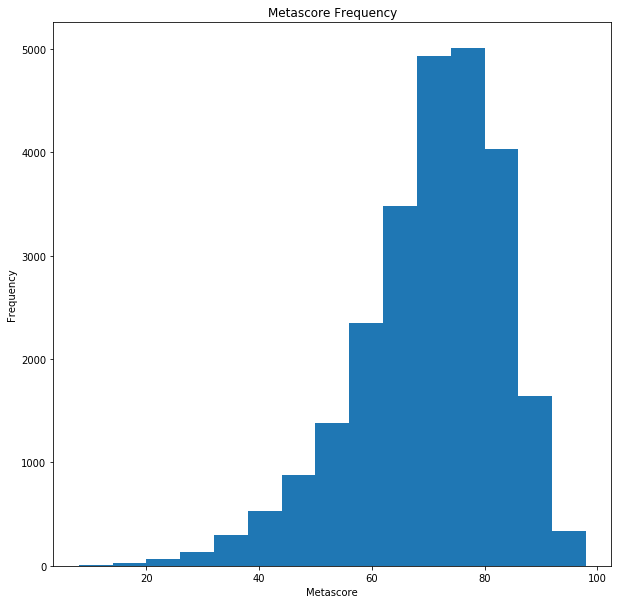

In [27]:
plt.figure(figsize=(10,10))
plt.hist(x=df.metascore,bins=15)
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.title('Metascore Frequency')
plt.show()

## Total number of game per platform 

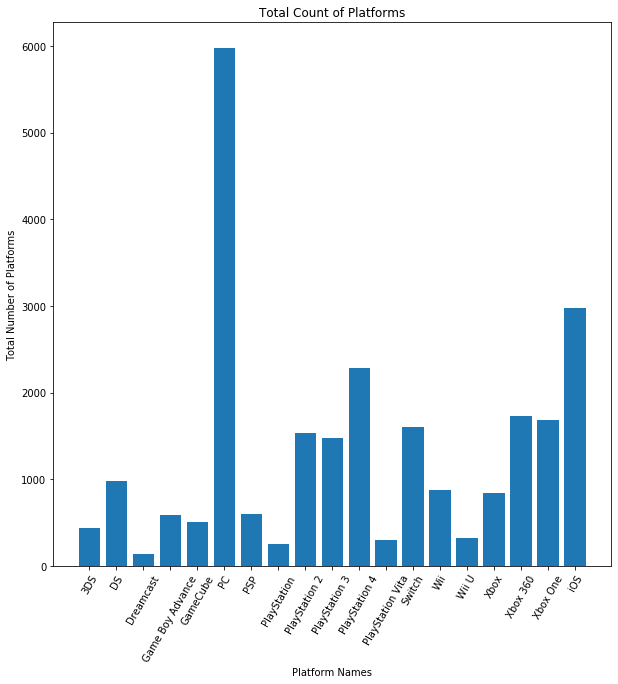

In [28]:
platforms = df.platform.str.get_dummies()
plt.figure(figsize=(10,10))
plt.bar(height = platforms.sum(),x = platforms.sum().index)
plt.title('Total Count of Platforms')
plt.xticks(rotation = 60)
plt.xlabel('Platform Names')
plt.ylabel('Total Number of Platforms')
plt.show()

##  Mean Metascore per Platform

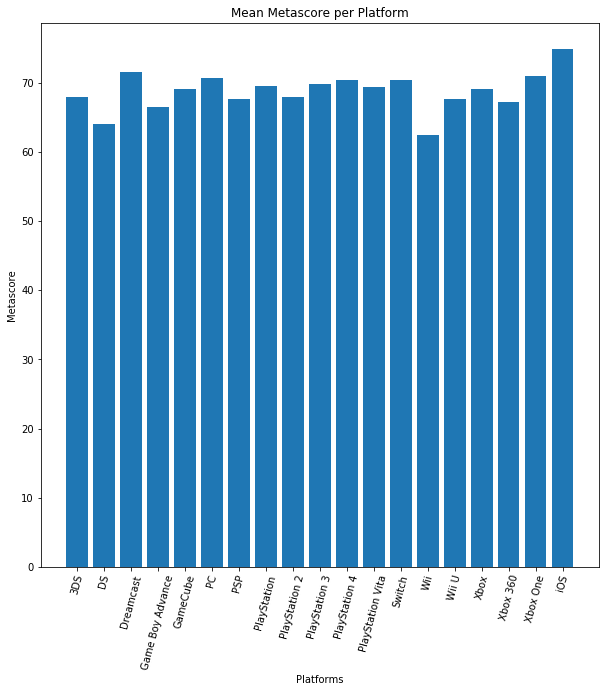

In [29]:
platform_mean = df.groupby('platform').mean().sort_values(by='platform').reset_index()

plt.figure(figsize=(10,10))
plt.bar(platform_mean['platform'],platform_mean['metascore'])
plt.xticks(rotation=75)
plt.title('Mean Metascore per Platform')
plt.xlabel('Platforms')
plt.ylabel('Metascore')
plt.show()

## Top 50 words by Weights

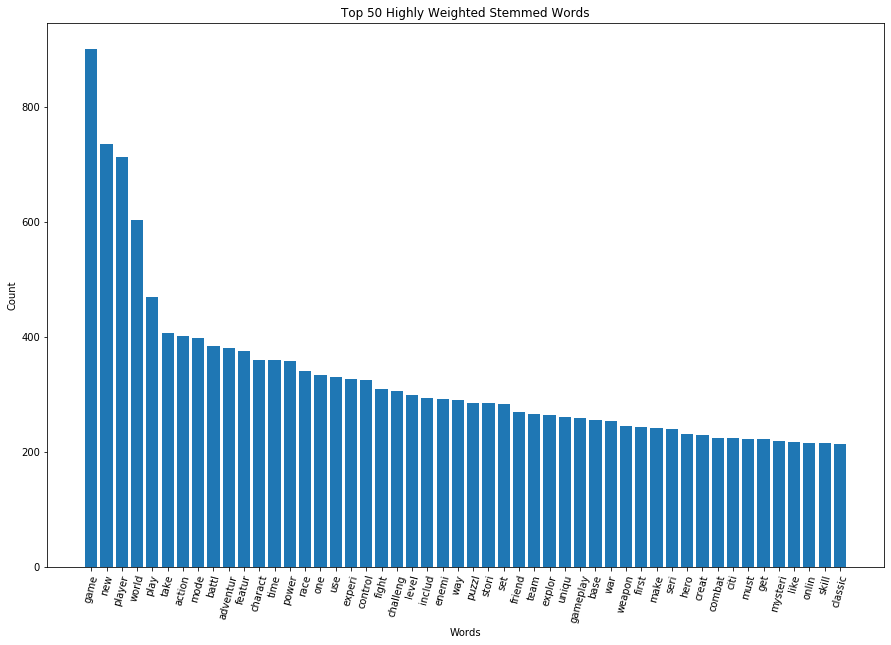

In [30]:
words = newdf.sum().sort_values(ascending = False)[0:50]

plt.figure(figsize=(15,10))
plt.bar(words.index,height=words)
plt.xticks(rotation=75)
plt.title('Top 50 Highly Weighted Stemmed Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()